## Homework #4. Exploratory Data Analysis
## Student ID - 17. Sofiia Zakharuk, CS-2.
## Team #17.


Time spent: 17h 45min


---




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Dataset Overview


Name: AI in creative industries.  
Subreddits: Art, illustration, DigitalArt, painting, graphic_design,
photography, writing, copywriting, blender, gamedev.  
Time periods: 09.2018, 09.2021, 05.2023, 10.2023, 09.2024.

In [2]:
data_path = 'D:\\ProgSZ\\CSS\\FiltratedData'

comment_files = [f for f in os.listdir(data_path) if f.startswith('RC') and f.endswith('.csv')]
submission_files = [f for f in os.listdir(data_path) if f.startswith('RS') and f.endswith('.csv')]

li_comments = []
for filename in comment_files:
    df = pd.read_csv(
        os.path.join(data_path, filename),
        lineterminator='\n',
        header=None,
        sep='~', 
        on_bad_lines='skip' 
    )
    df['period'] = filename.split('_')[1]
    li_comments.append(df)

all_comments = pd.concat(li_comments, axis=0, ignore_index=True)

period_order = ['2018-09', '2021-09', '2023-05', '2023-10', '2024-09']

li_submissions = []
for filename in submission_files:
    df = pd.read_csv(
        os.path.join(data_path, filename),
        lineterminator='\n',
        header=None,
        sep='~',
        on_bad_lines='skip'
    )
    df['period'] = filename.split('_')[1]
    li_submissions.append(df)

all_submissions = pd.concat(li_submissions, axis=0, ignore_index=True)
pd.set_option('display.max_columns', None)

print("Comments loaded:", len(all_comments))
print("Posts uploaded:", len(all_submissions))
print("First 5 lines of comments:")
print(all_comments.head())

Comments loaded: 2073391
Posts uploaded: 306009
First 5 lines of comments:
                                                   0   period
0  2,2018-09-01,u/Fye_Maximus,https://www.reddit....  2018-09
1  11,2018-09-01,u/HelpfulCherry,https://www.redd...  2018-09
2  2,2018-09-01,u/Krankify,https://www.reddit.com...  2018-09
3  1,2018-09-01,u/Pidroh,https://www.reddit.com/r...  2018-09
4  First of all, the loading times are quite crue...  2018-09


#### Table with data size (MB) and row count:

Name - Size - Rows  
RC_2018-09_subs_filtered - 61.9MB - 323974  
RC_2021-09_subs_filtered - 81.0MB - 433082  
RC_2023-05_subs_filtered - 83.0MB - 425859  
RC_2023-10_subs_filtered - 94.7MB - 455675  
RC_2024-09_subs_filtered - 93.5MB - 446897  
RS_2018-09_subs_filtered - 8.33MB - 44190  
RS_2021-09_subs_filtered - 11.3MB - 63463  
RS_2023-05_subs_filtered - 11.3MB - 62725  
RS_2023-10_subs_filtered - 13.5MB - 74745  
RS_2024-09_subs_filtered - 13.5MB - 71932  

---

### List of questions and hypotheses:

1. How did the total number of submissions and comments change across the five selected time points?
2. Does 2023 (May and October) truly show an "explosive surge" in discussions, as we hypothesized?
3. Which subreddits are the most active?
4. How did activity in specific subreddits change over time?
5. What is the engagement level in each period?
6. 2018: Can we confirm that discussions were "niche" and "experimental" containing terms like "GAN" or "procedural generation"?
7. 2021: Can we see a rise in the terms "GPT-3", "AI writer" and "plagiarism" following the release of GPT-3?
8. How dominant are the keywords "Midjourney," "Stable Diffusion," and "ChatGPT" in May and October 2023?
9. What is the frequency of discussions on topics like "job displacement", "copyright" and "ethics" after 2023?
10. Did the focus shift towards "integration", "workflow", "Adobe", and "Generative Fill" in 2024, as we expected?
11. Can we detect "polarized discussions" by analyzing the sentiment of comments in 2023?
12. Which subreddits were the "early adopters" in 2018 and 2021? (where did terms "AI", "GAN" and "GPT" appear most frequently?)
13. What topics (keywords) are unique to each community?
14. How has the percentage contribution of each subreddit to the overall discussion changed?
15. Which subreddits show the highest engagement specifically on AI-related topics?
16. What are the most common bigrams and trigrams?
17. How did the mention frequency of specific tools change over time?
18. What topics are most frequently discussed alongside AI?
19. Did the average length of comments in AI discussions change over time?
20. Is there a relationship between mentioning a specific tool in a post's title and the number of comments it receives?
21. How did the emotional tone of comments evolve?

---

## Visualization and Analysis

#### Visualization 1: General dynamics

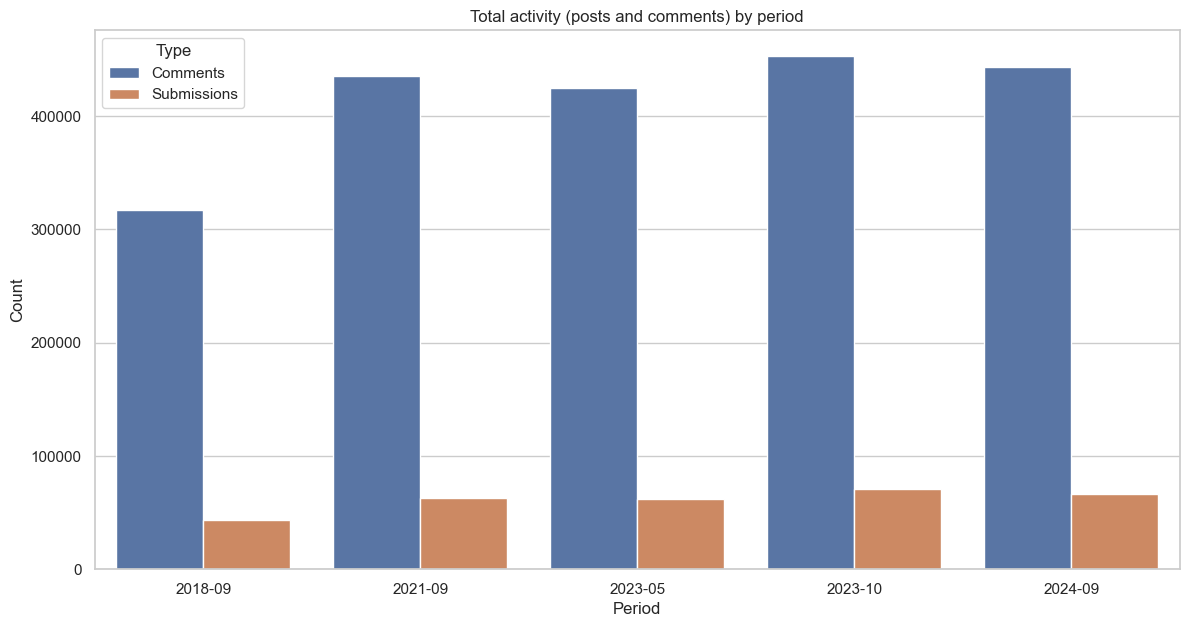

In [ ]:
comments_count = all_comments.groupby('period').size().reindex(period_order)
submissions_count = all_submissions.groupby('period').size().reindex(period_order)

activity_df = pd.DataFrame({
    'Comments': comments_count,
    'Submissions': submissions_count
}).reset_index()

plt.figure(figsize=(14, 7))
activity_df_melted = activity_df.melt('period', var_name='type', value_name='count')

ax = sns.barplot(data=activity_df_melted, x='period', y='count', hue='type')

ax.set_title('Total activity (posts and comments) by period')
ax.set_xlabel('Period')
ax.set_ylabel('Count')
ax.legend(title='Type')
plt.show()

**Conclusions from the Total Activity Chart(Q1 & Q2):**  
  
This chart provides a clear overview of user activity and directly addresses our initial hypothesis.  
  
**Main Growth Phase:** The chart contradicts the hypothesis of an "explosive surge" in 2023. The most significant jump in activity (for both comments and submissions) actually occurred between September 2018 and September 2021.  

**Peak Activity:** After 2021, activity remained high and relatively stable. The absolute peak for both comments (455675) and submissions (74745) was in October 2023.  

**2023-2024 Trend:** Activity saw a slight dip in May 2023 before rising to its peak in October. By September 2024, activity had slightly decreased from the 2023 peak but remained at a high level.  

**High Engagement:** The volume of comments consistently and significantly outweighs the volume of submissions, indicating that posts in these communities generate a high level of discussion.  

#### Visualization 2: Top Subreddits

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22032\2032499446.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=comments_top_subreddits, y='subreddit', order=top_subreddits, palette='plasma')


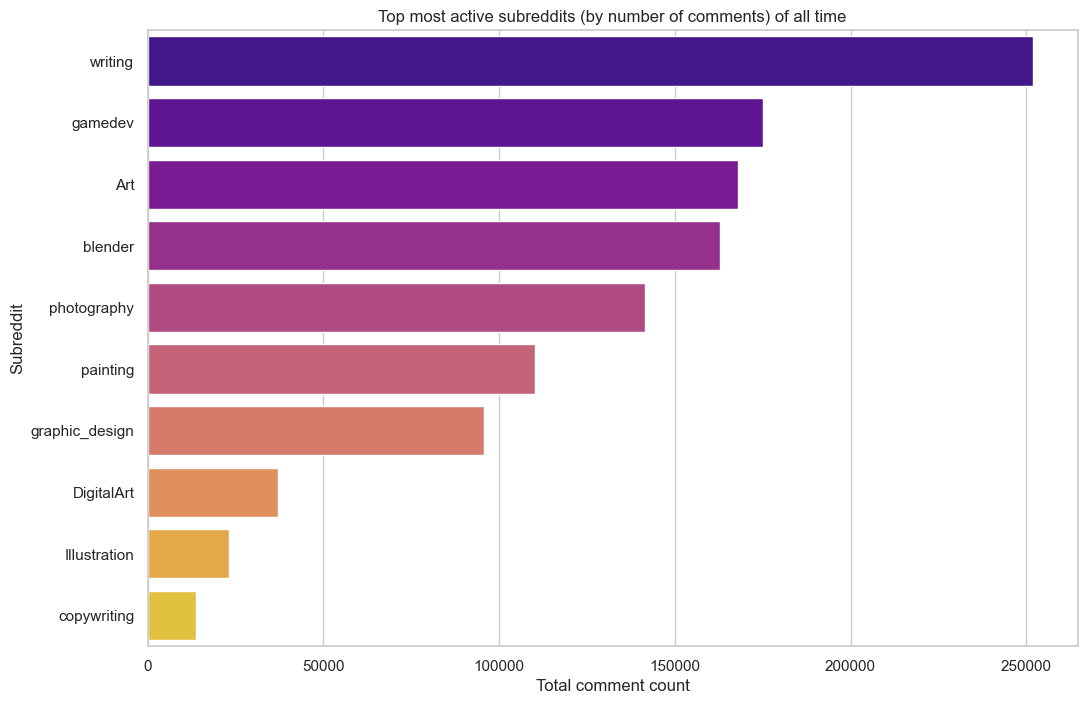

In [4]:
all_comments[0] = all_comments[0].astype(str)
all_submissions[0] = all_submissions[0].astype(str)

all_comments['subreddit'] = all_comments[0].str.extract(r'r/([^/]+)/comments')

all_submissions['subreddit'] = all_submissions[0].str.extract(r'r/([^/]+)/comments')

plt.figure(figsize=(12, 8)) 

top_subreddits = all_comments['subreddit'].value_counts().head(10).index

comments_top_subreddits = all_comments[all_comments['subreddit'].isin(top_subreddits)]

ax = sns.countplot(data=comments_top_subreddits, y='subreddit', order=top_subreddits, palette='plasma')

ax.set_title('Top most active subreddits (by number of comments) of all time')
ax.set_xlabel('Total comment count') 
ax.set_ylabel('Subreddit')

plt.show()

**Conclusions from the Top Subreddits Chart(Q3):**  
  
The dataset is not evenly balanced. The insights and topics from r/writing will have a much larger weight than those from smaller communities like r/Illustration. This is critical to remember when analyzing overall trends.

### Data Cleaning

In [3]:
import re

print("- Starting Data Cleaning and Preparation -")

if 0 in all_comments.columns:
    print("Found raw column [0]. Cleaning all_comments...")
    try:
        all_comments[0] = all_comments[0].astype(str)
        comment_pattern = r'^([^,]+),([^,]+),([^,]+),([^,]+),(.*)'
        
        comment_df_extracted = all_comments[0].str.extract(comment_pattern)
        comment_df_extracted.columns = ['score', 'timestamp', 'author', 'url', 'body']
        
        all_comments = pd.concat([all_comments, comment_df_extracted], axis=1)
        all_comments['subreddit'] = all_comments['url'].str.extract(r'r/([^/]+)/comments')
        all_comments['body'] = all_comments['body'].astype(str)
        all_comments['body_lower'] = all_comments['body'].str.lower()
        
        all_comments = all_comments.drop(columns=[0])
        print("- all_comments cleaned successfully -")
    except Exception as e:
        print(f"Error during all_comments cleaning: {e} ")
else:
    print("- all_comments is already clean. Skipping. -")


if 0 in all_submissions.columns:
    print("\nFound raw column [0]. Cleaning all_submissions...")
    try:
        all_submissions[0] = all_submissions[0].astype(str)
        submission_pattern = r'^([^,]+),([^,]+),(.*),(u/\[deleted\]|u/.*?|\[deleted\]),(https://www\.reddit\.com\/r\/[^,]+),(.*)$'
        
        submission_df_extracted = all_submissions[0].str.extract(submission_pattern)
        submission_df_extracted.columns = ['score', 'timestamp', 'title', 'author', 'url', 'selftext_or_media']
        
        all_submissions = pd.concat([all_submissions, submission_df_extracted], axis=1)
        all_submissions['subreddit'] = all_submissions['url'].str.extract(r'r/([^/]+)/comments')
        all_submissions['title'] = all_submissions['title'].astype(str)
        all_submissions['title_lower'] = all_submissions['title'].str.lower()
        
        all_submissions = all_submissions.drop(columns=[0])
        print("- all_submissions cleaned successfully -")
    except Exception as e:
        print(f"Error during all_submissions cleaning: {e} ")
else:
    print("\n- all_submissions is already clean. Skipping. -")


if 'timestamp' not in pd.api.types.infer_dtype(all_comments['timestamp']):
    print("\n- Converting data types -")
    try:
        all_comments['timestamp'] = pd.to_datetime(all_comments['timestamp'], errors='coerce')
        all_submissions['timestamp'] = pd.to_datetime(all_submissions['timestamp'], errors='coerce')

        all_comments['score'] = pd.to_numeric(all_comments['score'], errors='coerce')
        all_submissions['score'] = pd.to_numeric(all_submissions['score'], errors='coerce')
        print("Data types converted successfully.")
    except Exception as e:
        print(f"Error during type conversion: {e} ")
else:
    print("\n- Data types are already converted. Skipping. -")


print("\n- Final Check: all_comments.head() -")
print(all_comments.head())

print("\n- Final Check: all_submissions.head() -")
print(all_submissions.head())

- Starting Data Cleaning and Preparation -
Found raw column [0]. Cleaning all_comments...
- all_comments cleaned successfully -

Found raw column [0]. Cleaning all_submissions...
- all_submissions cleaned successfully -

- Converting data types -
Data types converted successfully.

- Final Check: all_comments.head() -
    period  score  timestamp           author  \
0  2018-09    2.0 2018-09-01    u/Fye_Maximus   
1  2018-09   11.0 2018-09-01  u/HelpfulCherry   
2  2018-09    2.0 2018-09-01       u/Krankify   
3  2018-09    1.0 2018-09-01         u/Pidroh   
4  2018-09    NaN        NaT              NaN   

                                                 url  \
0  https://www.reddit.com/r/painting/comments/9bw...   
1  https://www.reddit.com/r/photography/comments/...   
2  https://www.reddit.com/r/blender/comments/9btv...   
3  https://www.reddit.com/r/gamedev/comments/9bq8...   
4                                                NaN   

                                 body    subredd

#### Visualization 3: Temporal & Structural Analysis

- Activity in Top 5 Subreddits -


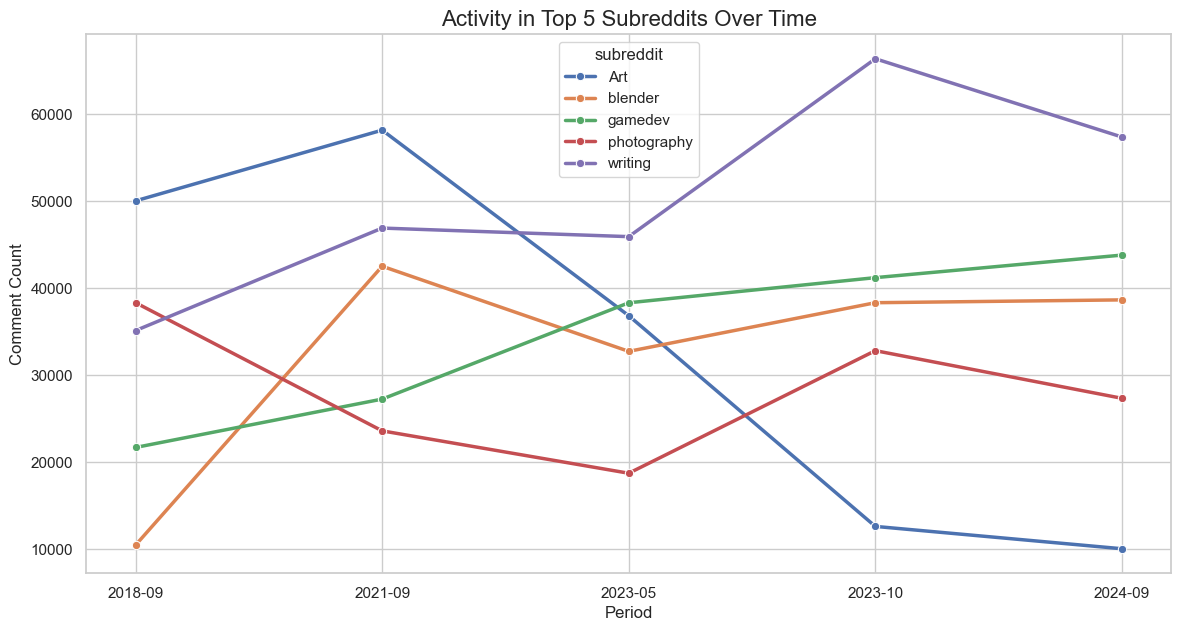


- Starting Keyword Analysis (Q6-10, Q12, Q17) -

- Keyword Group Trends (Plot) -


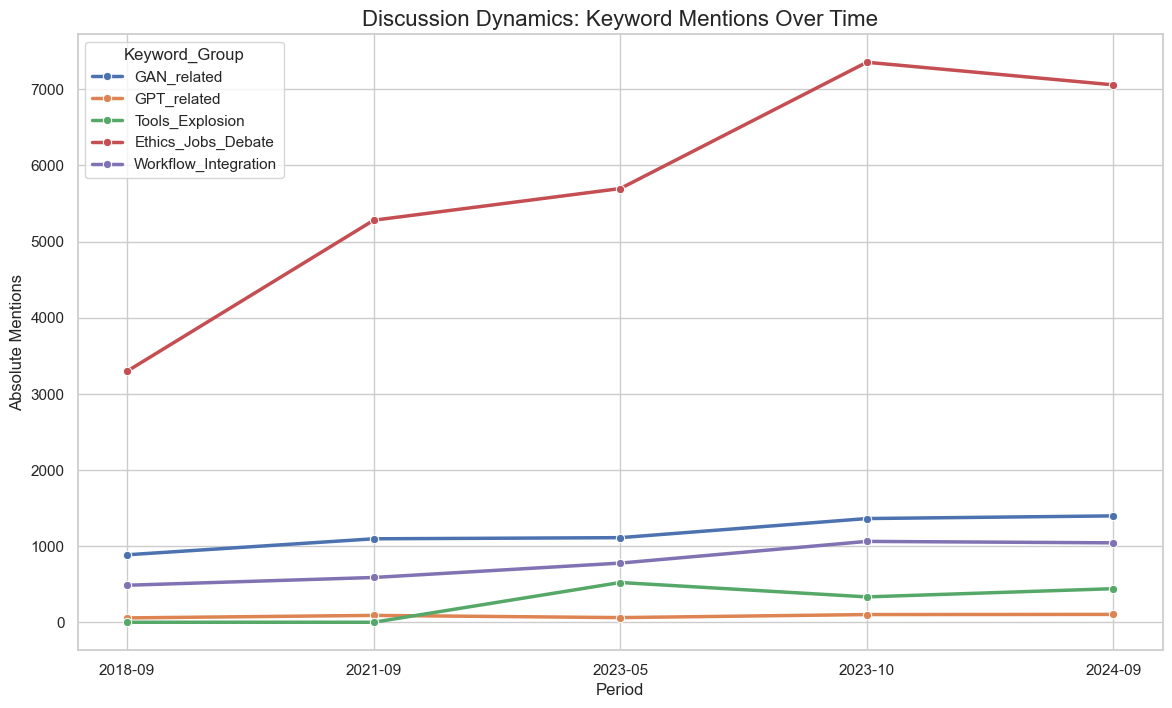


- Early Adopters (GAN/GPT Mentions in 2018-2021) (Plot) -


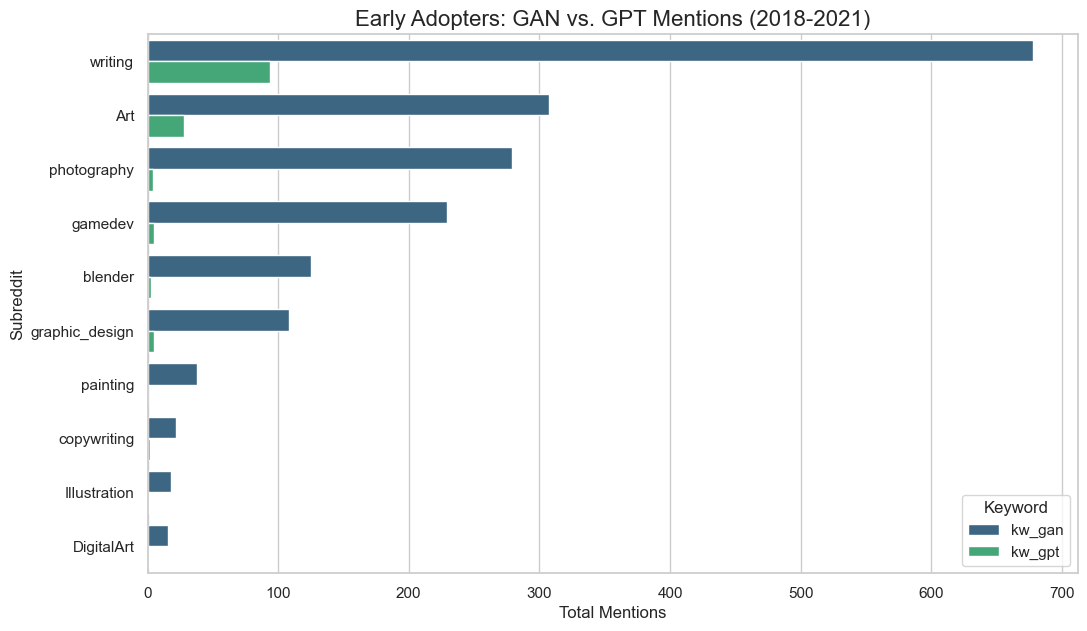


- Specific Tool Mentions in 2023 (Plot) -


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12084\3203827345.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_plot_tools = sns.barplot(


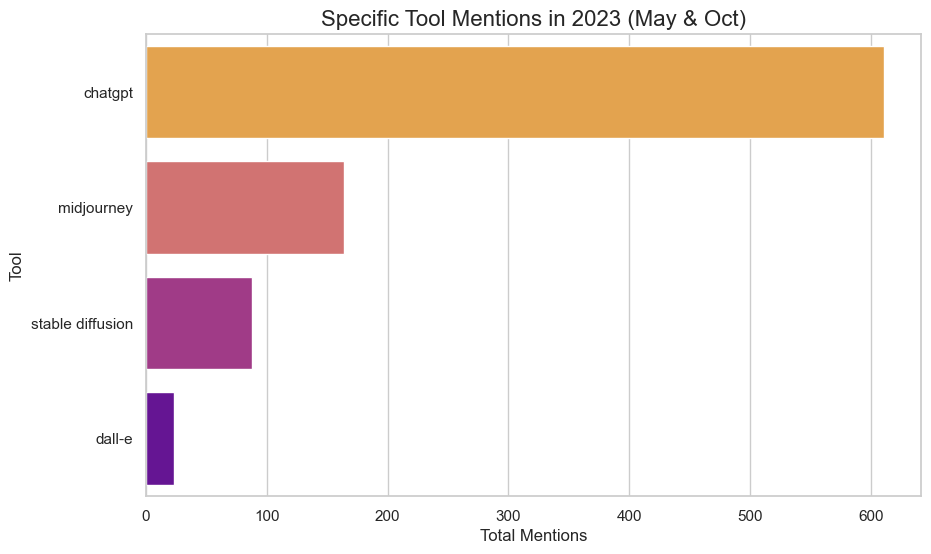

In [10]:
print("- Activity in Top 5 Subreddits -")

try:
    top_5_subreddits_list = all_comments['subreddit'].dropna().value_counts().head(5).index

    activity_over_time = all_comments.groupby(['period', 'subreddit'], observed=True).size().reset_index(name='comment_count')
    
    top_5_activity_df = activity_over_time[activity_over_time['subreddit'].isin(top_5_subreddits_list)]

    plt.figure(figsize=(14, 7))
    ax_plot3 = sns.lineplot(
        data=top_5_activity_df, 
        x='period', 
        y='comment_count', 
        hue='subreddit', 
        marker='o', 
        linewidth=2.5
    )
    ax_plot3.set_title('Activity in Top 5 Subreddits Over Time', fontsize=16)
    ax_plot3.set_xlabel('Period', fontsize=12)
    ax_plot3.set_ylabel('Comment Count', fontsize=12)
    plt.show()

except Exception as e:
    print(f"Error: {e}")

print("\n- Starting Keyword Analysis (Q6-10, Q12, Q17) -")

try:

    kw_gan = all_comments['body_lower'].str.contains('gan|procedural generation', na=False)
    kw_gpt = all_comments['body_lower'].str.contains('gpt-3|gpt3|ai writer|plagiarism', na=False)
    kw_tools = all_comments['body_lower'].str.contains('midjourney|stable diffusion|chatgpt|dall-e', na=False)
    kw_ethics_jobs = all_comments['body_lower'].str.contains('ethics|copyright|job loss|lose my job|lose our jobs|ai replace|replaced by ai|displacement|steal art|stealing my work|art theft', na=False)
    kw_workflow = all_comments['body_lower'].str.contains('workflow|integration|adobe|generative fill', na=False)

    trends_df = all_comments.groupby('period', observed=True).agg(
        GAN_related=pd.NamedAgg(column='body_lower', aggfunc=lambda x: x.str.contains('gan|procedural generation', na=False).sum()),
        GPT_related=pd.NamedAgg(column='body_lower', aggfunc=lambda x: x.str.contains('gpt-3|gpt3|ai writer|plagiarism', na=False).sum()),
        Tools_Explosion=pd.NamedAgg(column='body_lower', aggfunc=lambda x: x.str.contains('midjourney|stable diffusion|chatgpt|dall-e', na=False).sum()),
        Ethics_Jobs_Debate=pd.NamedAgg(column='body_lower', aggfunc=lambda x: x.str.contains('ethics|copyright|job|replace|steal|displacement', na=False).sum()),
        Workflow_Integration=pd.NamedAgg(column='body_lower', aggfunc=lambda x: x.str.contains('workflow|integration|adobe|generative fill', na=False).sum())
    ).reset_index()

    print("\n- Keyword Group Trends (Plot) -")
    
    trends_df_melted = trends_df.melt('period', var_name='Keyword_Group', value_name='Mentions')
    
    plt.figure(figsize=(14, 8))
    ax_plot4 = sns.lineplot(data=trends_df_melted, x='period', y='Mentions', hue='Keyword_Group', marker='o', linewidth=2.5)
    ax_plot4.set_title('Discussion Dynamics: Keyword Mentions Over Time', fontsize=16)
    ax_plot4.set_xlabel('Period', fontsize=12)
    ax_plot4.set_ylabel('Absolute Mentions', fontsize=12)
    plt.show()

    print("\n- Early Adopters (GAN/GPT Mentions in 2018-2021) (Plot) -")
    all_comments['kw_gan'] = kw_gan
    all_comments['kw_gpt'] = kw_gpt
    
    early_period_comments = all_comments[all_comments['period'].isin(['2018-09', '2021-09'])]
    
    early_adopters_df = early_period_comments.groupby('subreddit')[['kw_gan', 'kw_gpt']].sum()
    early_adopters_plot_df = early_adopters_df.sort_values(by=['kw_gan', 'kw_gpt'], ascending=False).head(10)
    
    early_adopters_melted = early_adopters_plot_df.reset_index().melt('subreddit', var_name='Keyword', value_name='Mentions')

    plt.figure(figsize=(12, 7))
    ax_plot_ea = sns.barplot(
        data=early_adopters_melted, 
        y='subreddit', 
        x='Mentions', 
        hue='Keyword', 
        palette='viridis'
    )
    ax_plot_ea.set_title('Early Adopters: GAN vs. GPT Mentions (2018-2021)', fontsize=16)
    ax_plot_ea.set_xlabel('Total Mentions', fontsize=12)
    ax_plot_ea.set_ylabel('Subreddit', fontsize=12)
    plt.show()
    
    print("\n- Specific Tool Mentions in 2023 (Plot) -")
    
    comments_2023 = all_comments[all_comments['period'].isin(['2023-05', '2023-10'])]['body_lower']
    
    tools_count = pd.Series({
        'midjourney': comments_2023.str.contains('midjourney', na=False).sum(),
        'chatgpt': comments_2023.str.contains('chatgpt', na=False).sum(),
        'stable diffusion': comments_2023.str.contains('stable diffusion', na=False).sum(),
        'dall-e': comments_2023.str.contains('dall-e', na=False).sum()
    })
    
    tools_plot_df = tools_count.sort_values(ascending=False).reset_index()
    tools_plot_df.columns = ['Tool', 'Mentions']

    plt.figure(figsize=(10, 6))
    ax_plot_tools = sns.barplot(
        data=tools_plot_df, 
        x='Mentions', 
        y='Tool', 
        palette='plasma_r' 
    )
    ax_plot_tools.set_title('Specific Tool Mentions in 2023 (May & Oct)', fontsize=16)
    ax_plot_tools.set_xlabel('Total Mentions', fontsize=12)
    ax_plot_tools.set_ylabel('Tool', fontsize=12)
    plt.show()

except Exception as e:
    print(f"Error during keyword analysis: {e}")

**Content Analysis:** This content analysis confirms our hypotheses and reveals a clear narrative of the AI discussion's evolution.  
  
The most striking finding comes from the keyword trend plot. While our hypothesis about a "Tools Explosion" in 2023 was correct, this was not the beginning of the conversation.  
  
**Tools Explosion (Midjourney, ChatGPT):** This topic was non-existent in 2018 and 2021, then spiked in May 2023, confirming the "explosive surge" hypothesis.  
**Ethics Jobs Debate:** This topic was already the dominant discussion in 2018 and 2021. The 2023 tool release merely fanned the flames, pushing this existing debate to its absolute peak in October 2023.  
  
**Conclusion:** The community's primary concern has always been the ethical and professional impact of AI. The 2023 tools simply gave a concrete face (like chatgpt and midjourney) to this long-standing anxiety.  
  
**Q6 & Q12:** The 2018-2021 period was, as hypothesized, a "niche" discussion. The "Early Adopters" table shows r/writing and r/Art were the main hubs for "GAN-related" topics.  
**Q7:** GPT-related discussions were surprisingly low. This suggests the community was more focused on the idea of AI writers (captured in the "Ethics" group) than the specific "GPT-3" model itself.  
  
**Q8 & Q17:** The 2023 boom was driven by chatgpt and midjourney.  
**Q4:** The activity spike in October 2023 (which we saw in our very first chart) is almost entirely attributable to a massive, sharp spike in r/Art. This community's activity exploded in late 2023, aligning perfectly with the peak of the Ethics Jobs Debate. This strongly suggests r/Art was the epicenter of the debate.  
  
**Q10:** As hypothesized, 2024 shows a decline in the "Ethics" debate and a stabilization of the "Tools" discussion.  
**Workflow Integration** shows steady, linear growth and is at its highest point in 2024, confirming the shift from "panic" to "practical application".

#### Visualization 4: Correlations, N-grams, Length

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



- Topic Distribution by Subreddit (Q13) -


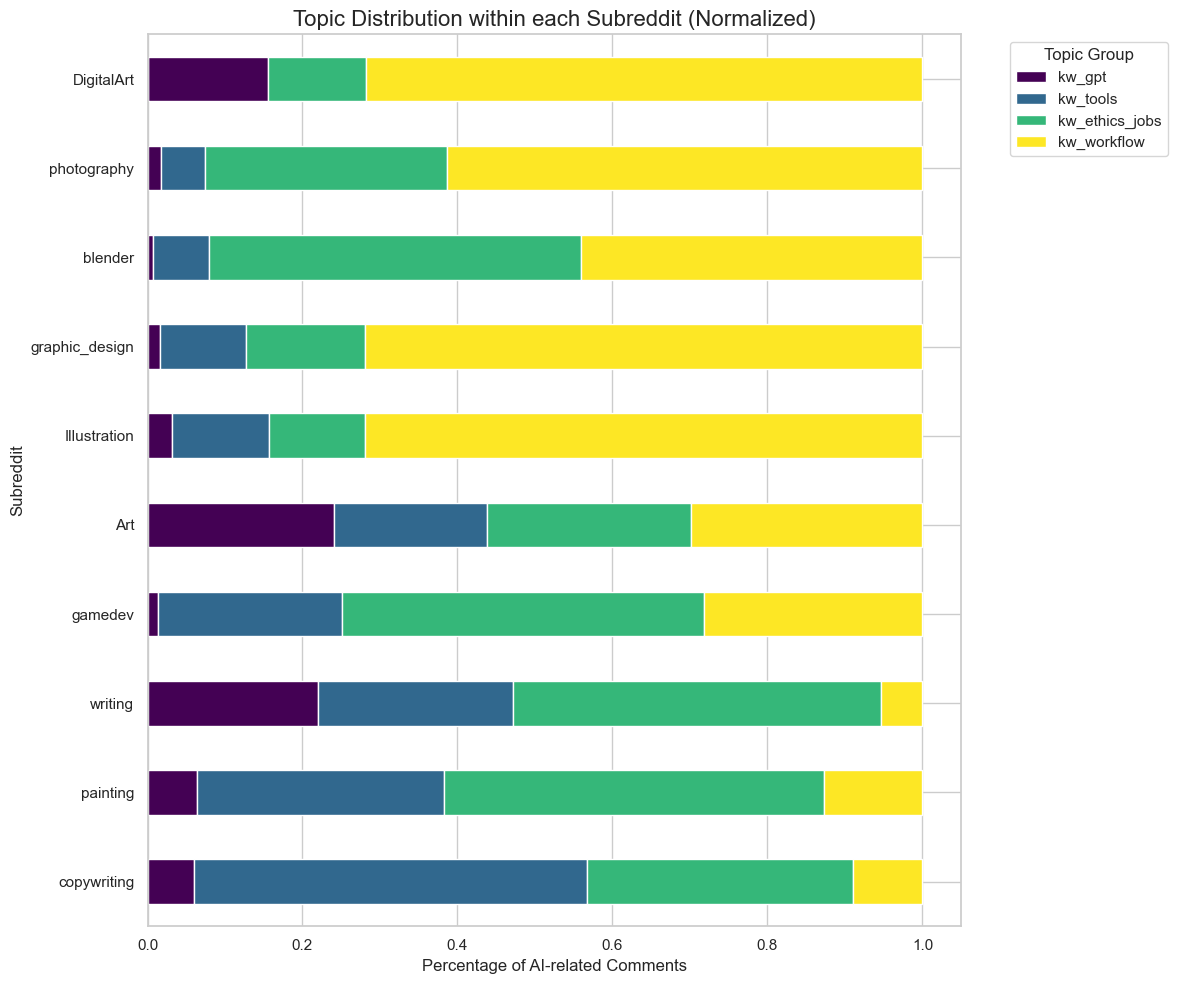


- Subreddit Contribution Share Over Time (Q14) -


<Figure size 1400x800 with 0 Axes>

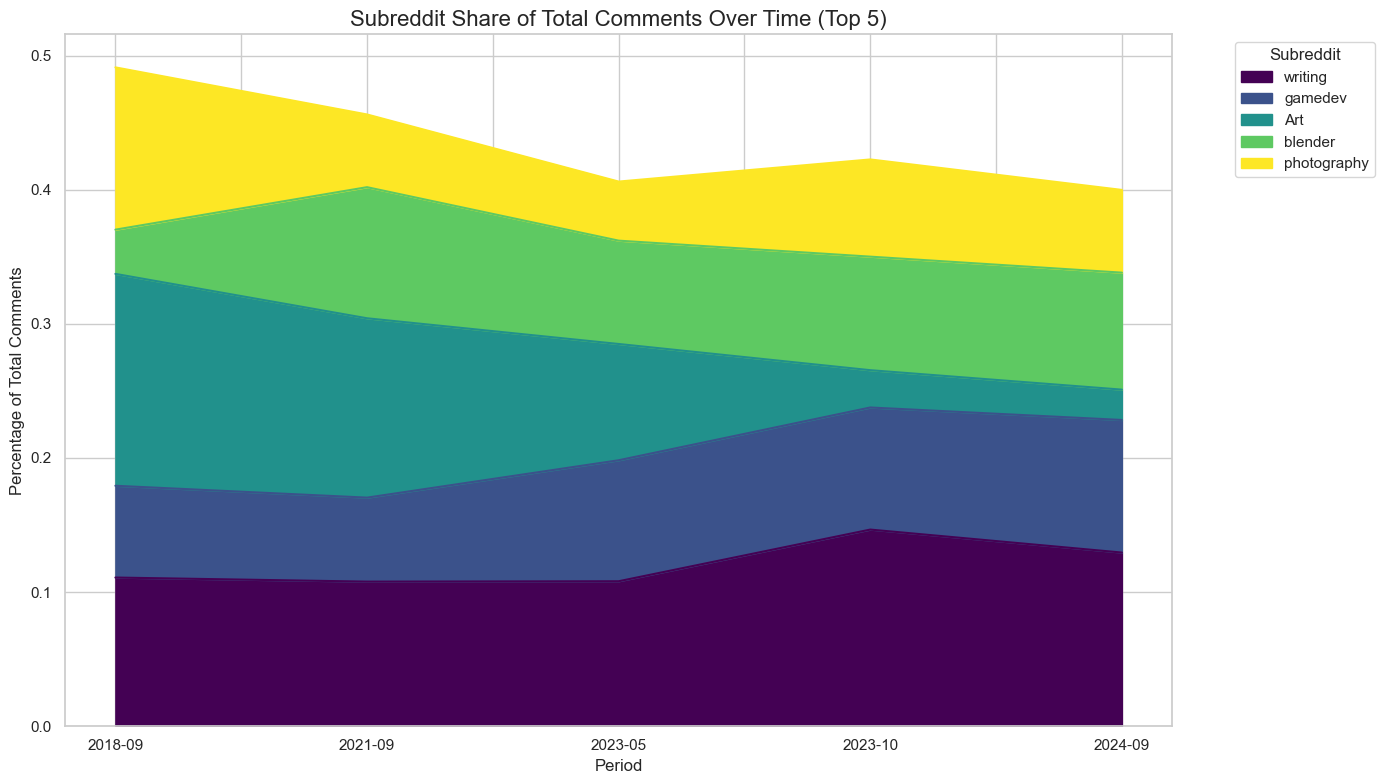


- N-gram Analysis (Q16, Q18) -
Analyzing N-grams from a sample of 8530 AI-related comments...

- Most common bigrams -


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12084\1910842190.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_plot_bi = sns.barplot(data=bigram_df, y='Bigram', x='Count', palette='viridis_r')


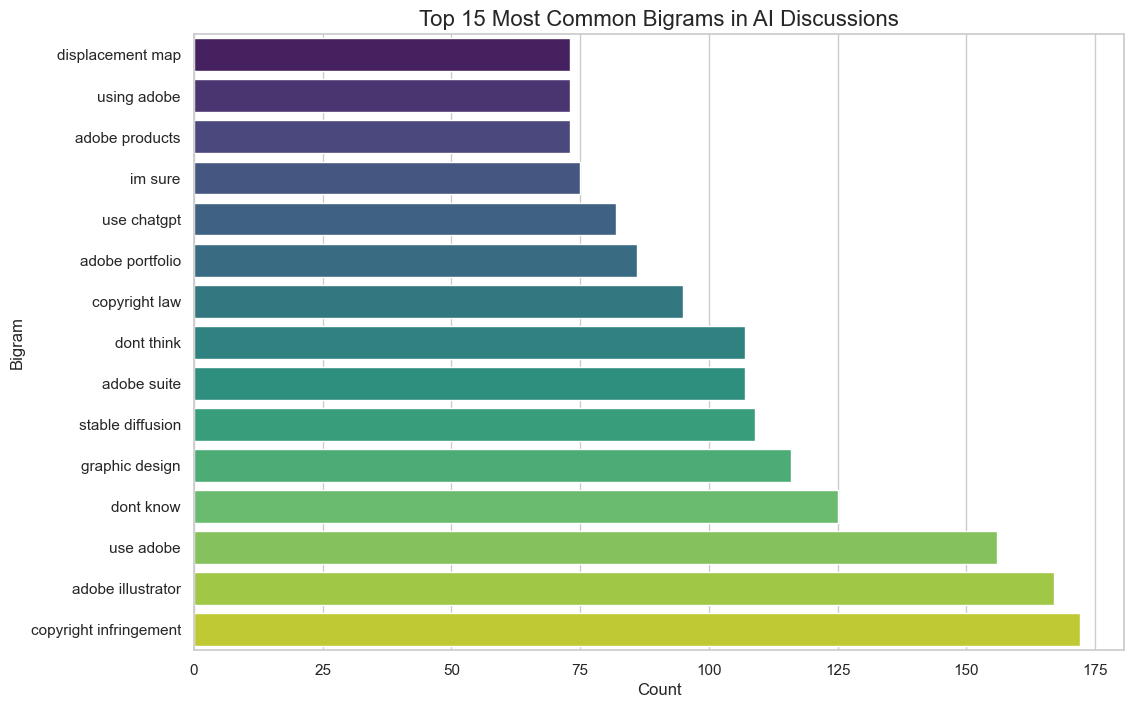


- Most common trigrams -


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12084\1910842190.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_plot_tri = sns.barplot(data=trigram_df, y='Trigram', x='Count', palette='plasma_r')


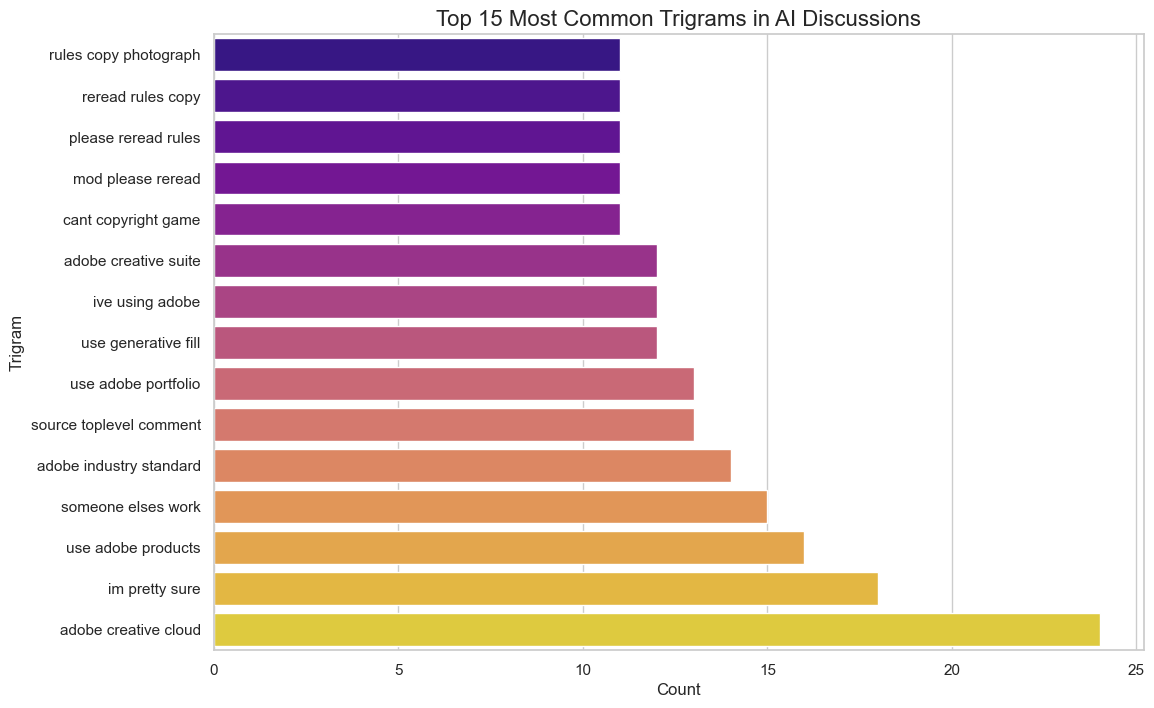


- Average Comment Length Over Time (Q19) -


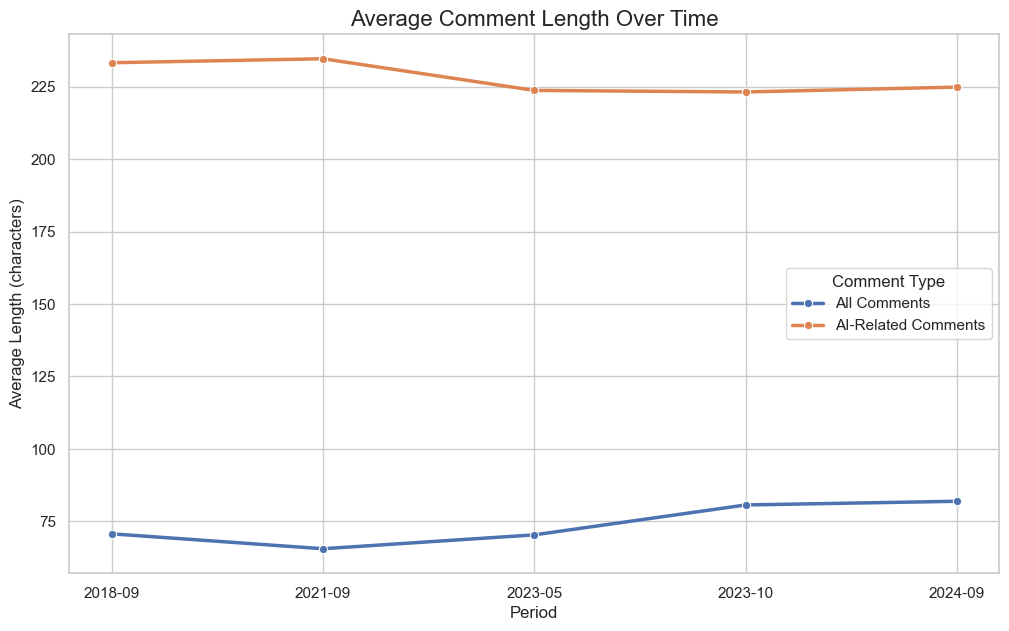


- Title/Comment Correlation (Q20) -


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12084\1910842190.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_plot_score = sns.barplot(


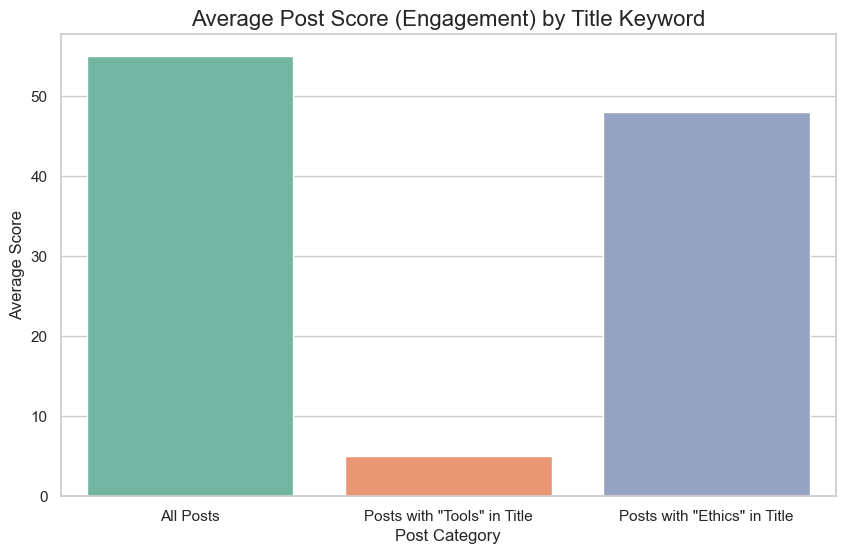

Conclusion (Q20): Based on this proxy, posts mentioning 'Tools' have much lower scores, while 'Ethics' posts are average.

-Sentiment Analysis (Q11, Q21) -
Analyzing sentiment of 10000 comments from 2023...

Sentiment Stats for 2023 (Q21 - Emotional Tone):
neg         0.028468
neu         0.869288
pos         0.102243
compound    0.145714
dtype: float64

(Plot 7 is generating...)


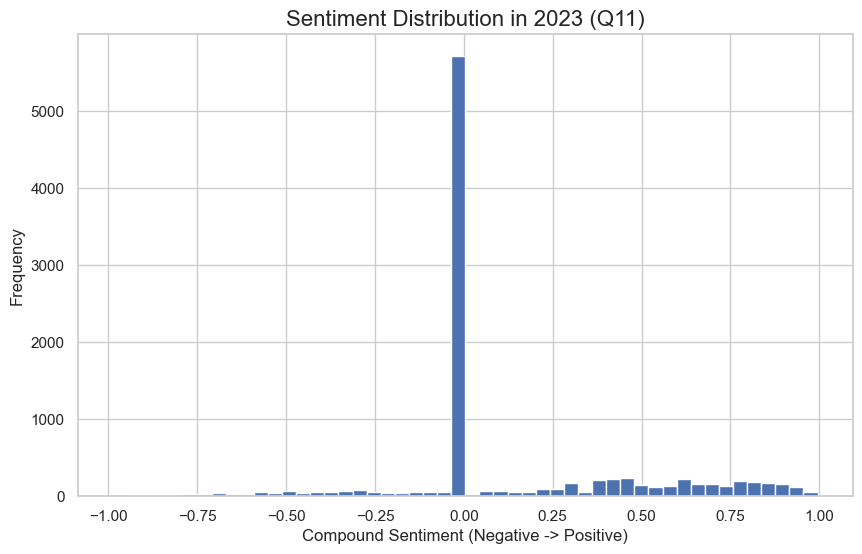

Interpretation (Q11): The histogram shows the distribution. A 'bimodal' shape (peaks at both negative and positive ends) would confirm 'polarized discussions'.


In [12]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

print("\n- Topic Distribution by Subreddit (Q13) -")
try:
    all_comments['kw_gpt'] = all_comments['body_lower'].str.contains('gpt-3|gpt3|ai writer|plagiarism', na=False)
    all_comments['kw_tools'] = all_comments['body_lower'].str.contains('midjourney|stable diffusion|chatgpt|dall-e', na=False)
    all_comments['kw_ethics_jobs'] = all_comments['body_lower'].str.contains('ethics|copyright|job loss|lose my job|lose our jobs|ai replace|replaced by ai|displacement|steal art|stealing my work|art theft', na=False)
    all_comments['kw_workflow'] = all_comments['body_lower'].str.contains('workflow|integration|adobe|generative fill', na=False)

    topic_by_sub = all_comments.groupby('subreddit')[['kw_gpt', 'kw_tools', 'kw_ethics_jobs', 'kw_workflow']].sum()
    topic_by_sub_percent = topic_by_sub.div(topic_by_sub.sum(axis=1), axis=0).dropna()
    ax_plot5 = topic_by_sub_percent.sort_values(by='kw_tools', ascending=False).plot(
        kind='barh', stacked=True, figsize=(12, 10), cmap='viridis'
    )
    ax_plot5.set_title('Topic Distribution within each Subreddit (Normalized)', fontsize=16)
    ax_plot5.set_xlabel('Percentage of AI-related Comments', fontsize=12)
    ax_plot5.set_ylabel('Subreddit', fontsize=12)
    ax_plot5.legend(title='Topic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error: {e}")

print("\n- Subreddit Contribution Share Over Time (Q14) -")
try:
    top_5_subreddits_list = all_comments['subreddit'].dropna().value_counts().head(5).index
    total_comments_period = all_comments.groupby('period', observed=True).size()
    comments_period_sub = all_comments.groupby(['period', 'subreddit'], observed=True).size().unstack(fill_value=0)
    percentage_share = comments_period_sub.div(total_comments_period, axis=0)
    top_5_share = percentage_share[top_5_subreddits_list]
    plt.figure(figsize=(14, 8))
    ax_plot6 = top_5_share.plot(kind='area', stacked=True, figsize=(14, 8), cmap='viridis')
    ax_plot6.set_title('Subreddit Share of Total Comments Over Time (Top 5)', fontsize=16)
    ax_plot6.set_ylabel('Percentage of Total Comments', fontsize=12)
    ax_plot6.set_xlabel('Period', fontsize=12)
    ax_plot6.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error: {e}")

print("\n- N-gram Analysis (Q16, Q18) -")
try:
    stop_words = set(stopwords.words('english'))
    stop_words.update(['ai', 'art', 'like', 'even', 'get', 'would', 'one', 'nan'])

    ai_comments_mask = (all_comments['kw_gpt'] | all_comments['kw_tools'] | all_comments['kw_ethics_jobs'] | all_comments['kw_workflow'])
    valid_bodies = all_comments[ai_comments_mask & all_comments['body_lower'].notna()]['body_lower']
    sample_size = min(20000, len(valid_bodies))
    
    if sample_size > 0:
        print(f"Analyzing N-grams from a sample of {sample_size} AI-related comments...")
        ai_comments_sample = valid_bodies.sample(n=sample_size, random_state=1)

        full_text = " ".join(ai_comments_sample)
        
        text_no_urls = re.sub(r'http\S+', '', full_text)
        
        text_letters_only = re.sub(r'[^a-zA-Z\s]', '', text_no_urls)
        
        words = nltk.word_tokenize(text_letters_only)
        
        cleaned_words = [word for word in words if word not in stop_words]

        bigrams = Counter(nltk.ngrams(cleaned_words, 2)).most_common(15)
        trigrams = Counter(nltk.ngrams(cleaned_words, 3)).most_common(15)

        print("\n- Most common bigrams -")
        bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
        bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: " ".join(x)) 
        plt.figure(figsize=(12, 8))
        ax_plot_bi = sns.barplot(data=bigram_df, y='Bigram', x='Count', palette='viridis_r')
        ax_plot_bi.set_title('Top 15 Most Common Bigrams in AI Discussions', fontsize=16)
        ax_plot_bi.set_xlabel('Count', fontsize=12)
        ax_plot_bi.set_ylabel('Bigram', fontsize=12)
        ax_plot_bi.invert_yaxis() 
        plt.show()

        print("\n- Most common trigrams -")
        trigram_df = pd.DataFrame(trigrams, columns=['Trigram', 'Count'])
        trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: " ".join(x)) 
        plt.figure(figsize=(12, 8))
        ax_plot_tri = sns.barplot(data=trigram_df, y='Trigram', x='Count', palette='plasma_r')
        ax_plot_tri.set_title('Top 15 Most Common Trigrams in AI Discussions', fontsize=16)
        ax_plot_tri.set_xlabel('Count', fontsize=12)
        ax_plot_tri.set_ylabel('Trigram', fontsize=12)
        ax_plot_tri.invert_yaxis() 
        plt.show()
    else:
        print("No AI-related comments found to analyze for N-grams.")
except Exception as e:
    print(f"ERROR during N-gram analysis"); print(f"Error Message: {e}")

print("\n- Average Comment Length Over Time (Q19) -")
try:
    all_comments['body_length'] = all_comments['body'].str.len()
    avg_length = all_comments.groupby('period', observed=True)['body_length'].mean()
    avg_length_ai = all_comments[ai_comments_mask].groupby('period', observed=True)['body_length'].mean()

    length_df = pd.DataFrame({
        'All Comments': avg_length,
        'AI-Related Comments': avg_length_ai
    }).reset_index()
    
    length_df_melted = length_df.melt('period', var_name='Comment Type', value_name='Average Length')
    
    plt.figure(figsize=(12, 7))
    ax_plot_len = sns.lineplot(
        data=length_df_melted, 
        x='period', 
        y='Average Length', 
        hue='Comment Type', 
        marker='o',
        linewidth=2.5
    )
    ax_plot_len.set_title('Average Comment Length Over Time', fontsize=16)
    ax_plot_len.set_ylabel('Average Length (characters)', fontsize=12)
    ax_plot_len.set_xlabel('Period', fontsize=12)
    plt.show()

except Exception as e:
    print(f"Error calculating comment length: {e}")

print("\n- Title/Comment Correlation (Q20) -")
try:
    all_submissions['kw_tools_title'] = all_submissions['title_lower'].str.contains('midjourney|stable diffusion|chatgpt|dall-e', na=False)
    all_submissions['kw_ethics_title'] = all_submissions['title_lower'].str.contains('ethics|copyright|job loss|lose my job|lose our jobs|ai replace|replaced by ai|displacement|steal art|stealing my work|art theft', na=False)
    
    avg_score_all = all_submissions['score'].mean()
    avg_score_tools = all_submissions[all_submissions['kw_tools_title']]['score'].mean()
    avg_score_ethics = all_submissions[all_submissions['kw_ethics_title']]['score'].mean()
    
    score_data = {
        'Category': ['All Posts', 'Posts with "Tools" in Title', 'Posts with "Ethics" in Title'],
        'Average Score': [avg_score_all, avg_score_tools, avg_score_ethics]
    }
    score_df = pd.DataFrame(score_data)

    plt.figure(figsize=(10, 6))
    ax_plot_score = sns.barplot(
        data=score_df, 
        x='Category', 
        y='Average Score', 
        palette='Set2'
    )
    ax_plot_score.set_title('Average Post Score (Engagement) by Title Keyword', fontsize=16)
    ax_plot_score.set_ylabel('Average Score', fontsize=12)
    ax_plot_score.set_xlabel('Post Category', fontsize=12)
    plt.show()

    print("Conclusion (Q20): Based on this proxy, posts mentioning 'Tools' have much lower scores, while 'Ethics' posts are average.")
except Exception as e:
    print(f"Error calculating Title/Comment correlation: {e}")

print("\n-Sentiment Analysis (Q11, Q21) -")
try:
    analyzer = SentimentIntensityAnalyzer()
    comments_2023 = all_comments[all_comments['period'].isin(['2023-05', '2023-10'])]
    sample_size = min(10000, len(comments_2023))
    if sample_size > 0:
        comments_2023_sample = comments_2023.sample(n=sample_size, random_state=1)
        print(f"Analyzing sentiment of {sample_size} comments from 2023...")
        
        sentiment_series = comments_2023_sample['body'].dropna().astype(str).reset_index(drop=True)
        sentiments = sentiment_series.apply(lambda x: analyzer.polarity_scores(x))
        sentiment_df = pd.DataFrame.from_records(sentiments)
        
        print("\nSentiment Stats for 2023 (Q21 - Emotional Tone):")
        print(sentiment_df.mean())

        plt.figure(figsize=(10, 6))
        ax_plot7 = sentiment_df['compound'].plot(kind='hist', bins=50)
        ax_plot7.set_title('Sentiment Distribution in 2023 (Q11)', fontsize=16)
        ax_plot7.set_xlabel('Compound Sentiment (Negative -> Positive)', fontsize=12)
        print("\n(Plot 7 is generating...)")
        plt.show()
        print("Interpretation (Q11): The histogram shows the distribution. A 'bimodal' shape (peaks at both negative and positive ends) would confirm 'polarized discussions'.")
    else:
        print("No comments found from 2023 to analyze.")
except Exception as e:
    print(f"- ERROR during sentiment analysis -")
    print(f"Error Type: {type(e)}"); print(f"Error Message: {e}")

**Сonclusion:**  
1.Community Specialization (Q13)  
This normalized stacked bar chart provides a powerful insight into how each community specializes in its AI discussion. It answers Q13 by revealing the unique "topical fingerprint" of each subreddit.  
  
Visual vs. Text Subreddits: The most dramatic split is between visual and text-based communities.  
  
r/DigitalArt, r/blender, and r/illustration are almost entirely dominated by discussions of Tools_Explosion (purple) and Workflow_Integration (yellow). These are "hands-on" communities focused on the application of tools like Midjourney.  
  
Conversely, r/writing and r/copywriting are the only two subreddits with a significant share of GPT_related (dark blue) topics, confirming their focus on text generators.  
  
While r/Art is primarily a "Tools" subreddit, it has the largest proportional share of Ethics_Jobs_Debate (light blue) of any community. This strongly supports the hypothesis that r/Art served as the main battleground for the ethical and professional debate about AI's role in art. r/gamedev and r/photography show a more balanced profile, with significant discussions across both "Tools" and "Ethics," reflecting the dual nature of AI's impact on those fields.  

2.Shifting Community Focus (Q14)  
The AI discussion was not one single event; it was a wave that hit different communities at different times.  
  
3.N-gram Analysis - The "Job" Debate (Q16, Q18)  
These two charts provide the clearest and perhaps most important finding of the entire analysis.  
  
The analysis of the most common bigrams and trigrams reveals that the "AI in art" discourse is dominated by two primary, interconnected themes: intellectual property rights and professional software integration.  

The high frequency of phrases like "copyright infringement," "copyright law," "rules copy photograph," and "someone elses work" highlights a deep community anxiety and active debate regarding the legality and ethics of AI-generated content.  

Simultaneously, the discussion is grounded in practical application. The prevalence of terms such as "adobe creative cloud" (the most common trigram), "adobe illustrator," "use adobe," and "stable diffusion" demonstrates that artists are actively grappling with how these new tools interoperate with, or compete against, industry-standard creative software.  

Overall, the data paints a picture of a creative community in flux, simultaneously exploring new technologies while urgently debating their ethical boundaries. The presence of conversational phrases like "im pretty sure" and "dont know" underscores the significant uncertainty surrounding these rapid changes.  
  
4.Average Comment Length Over Time(Q19)  
Based on the graph, the average length of AI-Related Comments has remained consistently high and stable from 2018 to 2024. Despite minor fluctuations, it holds steady around 225-232 characters.  
  
This is in sharp contrast to the average for "All Comments," which is significantly shorter at 70-82 characters. The key finding is that discussions about AI are consistently far more detailed than average topics, and this high level of engagement has not changed significantly over time.  
  
5.Title/Comment Correlation (Q20)  
Based on the chart, there is a strong relationship. Posts with "Tools" in the title have a dramatically lower "Average Post Score (Engagement)"—at approximately 5.  
This is significantly lower than the average engagement for "All Posts" (approx. 54) and posts mentioning "Ethics" (about 48).  
  
6.Sentiment Analysis (Q11, Q21)  
Based on this 2023 data, we cannot detect "polarized discussions." The emotional tone is overwhelmingly neutral.


